# Busqueda por Costo

A continuacion se ejemplifica la busqueda por costo revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano y su distancia.


In [8]:
# Busqueda por costo.

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    
    

In [9]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

In [43]:
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba':190, 'Quito':280, 'Guayaquil':170},
        'Latacunga': {'Ambato':50, 'Quito':30},
        'Esmeraldas': {'Manta':80},
        'Manta': {'Guayaquil':60},
        'Quito': {'Riobamba':110, 'Latacunga':30, 'Cuenca':280, 'Guayaquil':190, 'Puyo':170},
        'Riobamba': {'Cuenca':190, 'Quito':110},
        'Ambato': {'Latacunga':50, 'Puyo':80, 'Guayaquil':230},
        'Puyo': {'Ambato':60, 'Quito':170},
        'Machala': {'Guayaquil':80},
        'Guayaquil': {'Machala':80, 'Ambato':230, 'Quito':190, 'Cuenca':170, 'Manta':60}
    }

    init_state = 'Guayaquil'
    solution = 'Puyo'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")

['Guayaquil', 'Ambato', 'Puyo']
Costo total: 310


## Practica

Implementar un algoritmo que me permita dibujar las conexiones con los costos y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Policia/UPC/Funcion Judicial, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas generando un arbol jerarquico.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

Generar un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.


1.Implementar un algoritmo que me permita dibujar las conexiones con los costos y los resultados del grafo. 

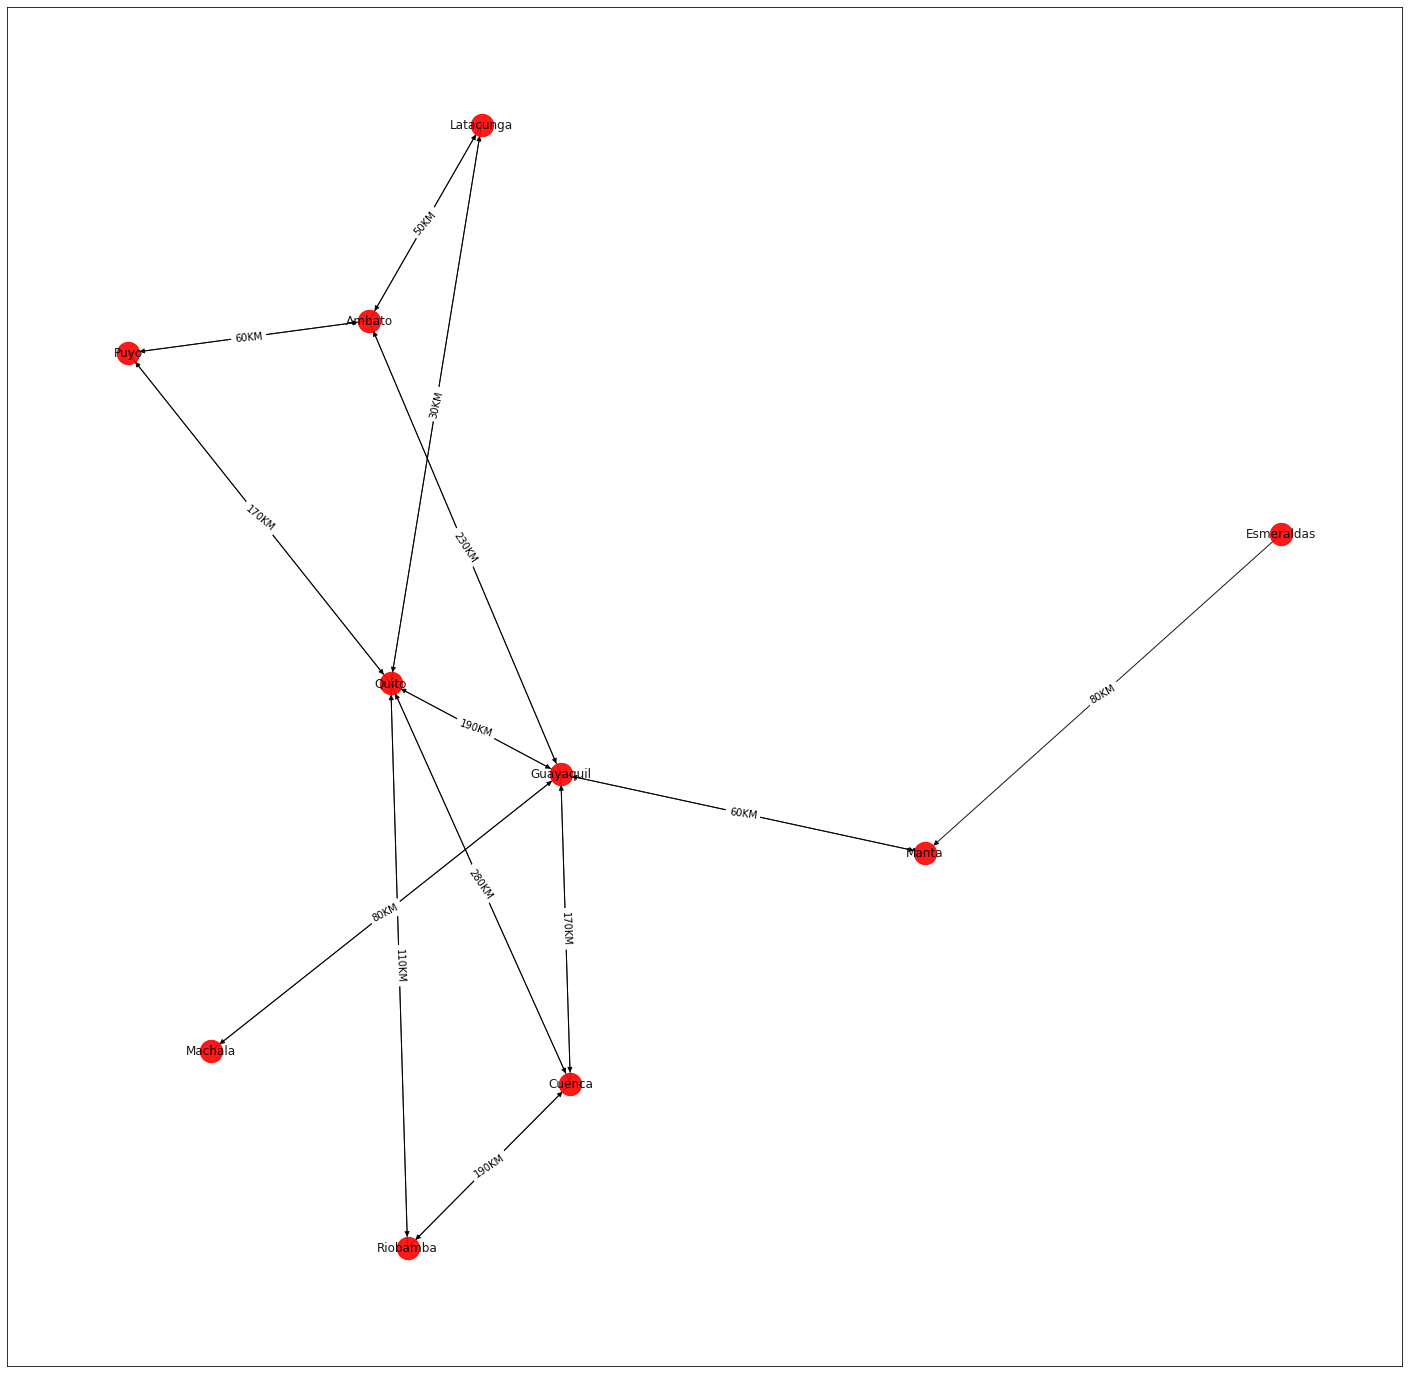

In [28]:
# Implementar
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

connections = {
        'Cuenca': {'Riobamba':190, 'Quito':280, 'Guayaquil':170},
        'Latacunga': {'Ambato':50, 'Quito':30},
        'Esmeraldas': {'Manta':80},
        'Manta': {'Guayaquil':60},
        'Quito': {'Riobamba':110, 'Latacunga':30, 'Cuenca':280, 'Guayaquil':190, 'Puyo':170},
        'Riobamba': {'Cuenca':190, 'Quito':110},
        'Ambato': {'Latacunga':50, 'Puyo':80, 'Guayaquil':230},
        'Puyo': {'Ambato':60, 'Quito':170},
        'Machala': {'Guayaquil':80},
        'Guayaquil': {'Machala':80, 'Ambato':230, 'Quito':190, 'Cuenca':170, 'Manta':60}
} 



def graficarCiudades(conexiones):
    G = nx.DiGraph()
    G.add_nodes_from(conexiones) 
    for valor, listaValor in conexiones.items():
        for a in listaValor:    
            G.add_edge(valor,a,kilometros=str(listaValor[a])+"KM")
        
    plt.figure(figsize=(25,25))  
    pos=nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G,'kilometros')   
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels) 
    nx.draw_networkx(G, pos, node_color = "red", node_size=500, alpha=0.9, labels={node:node for node in G.nodes()})
    plt.show()

graficar(connections)

2.Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Policia/UPC/Funcion Judicial, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas generando un arbol jerarquico.

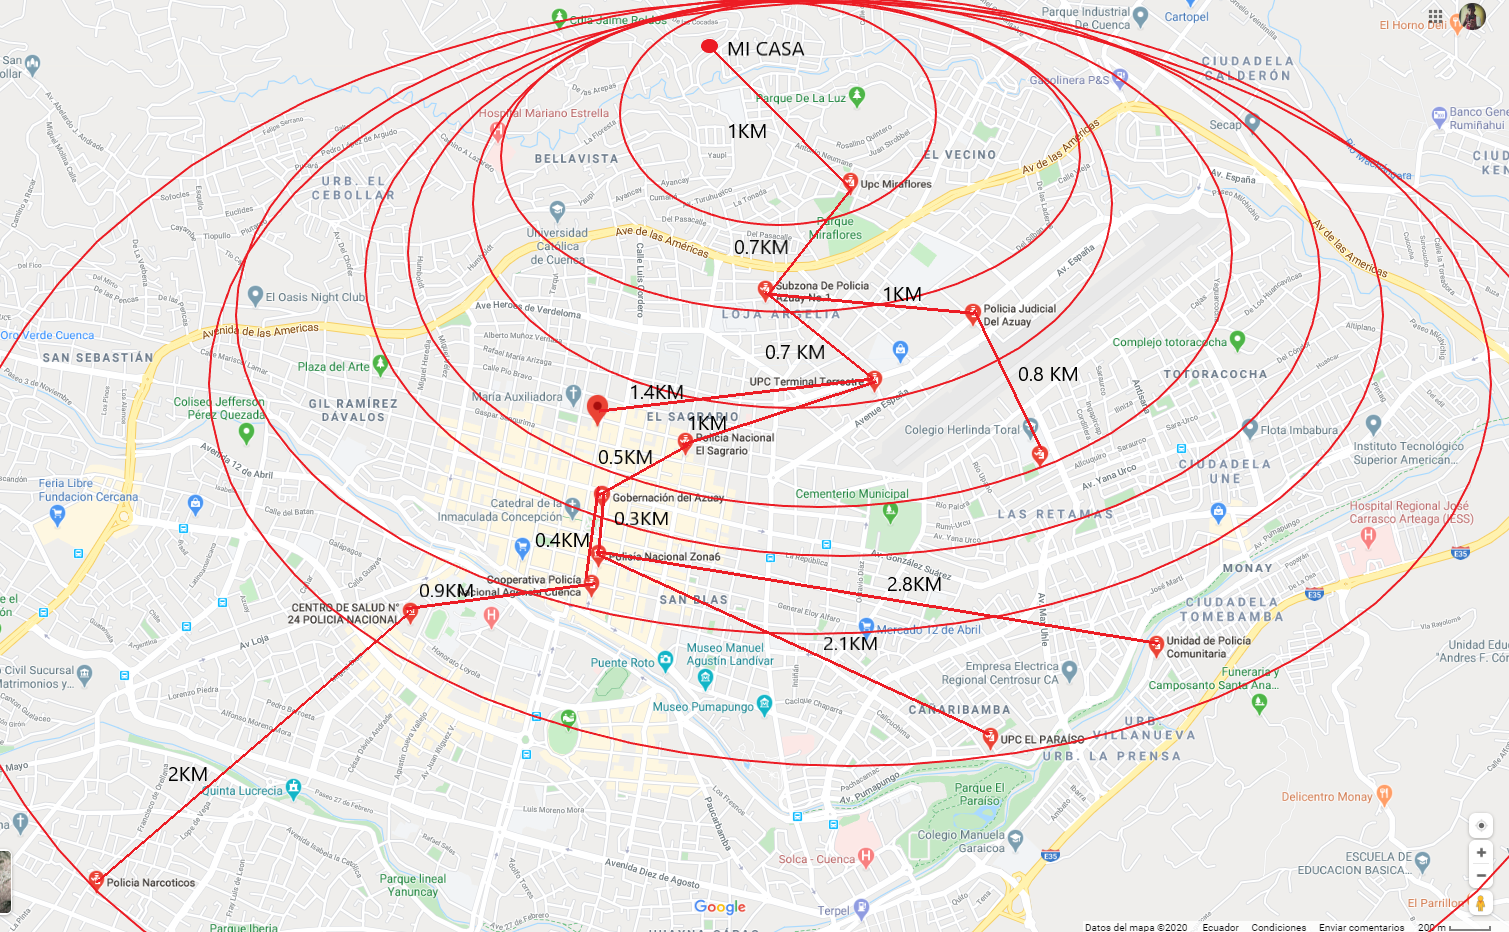

In [57]:
from IPython.display import Image
Image(filename='Policias.png')

Las CONEXIONES DEL GRAFO DE POLICIAS SON LAS SIGUIENTES 



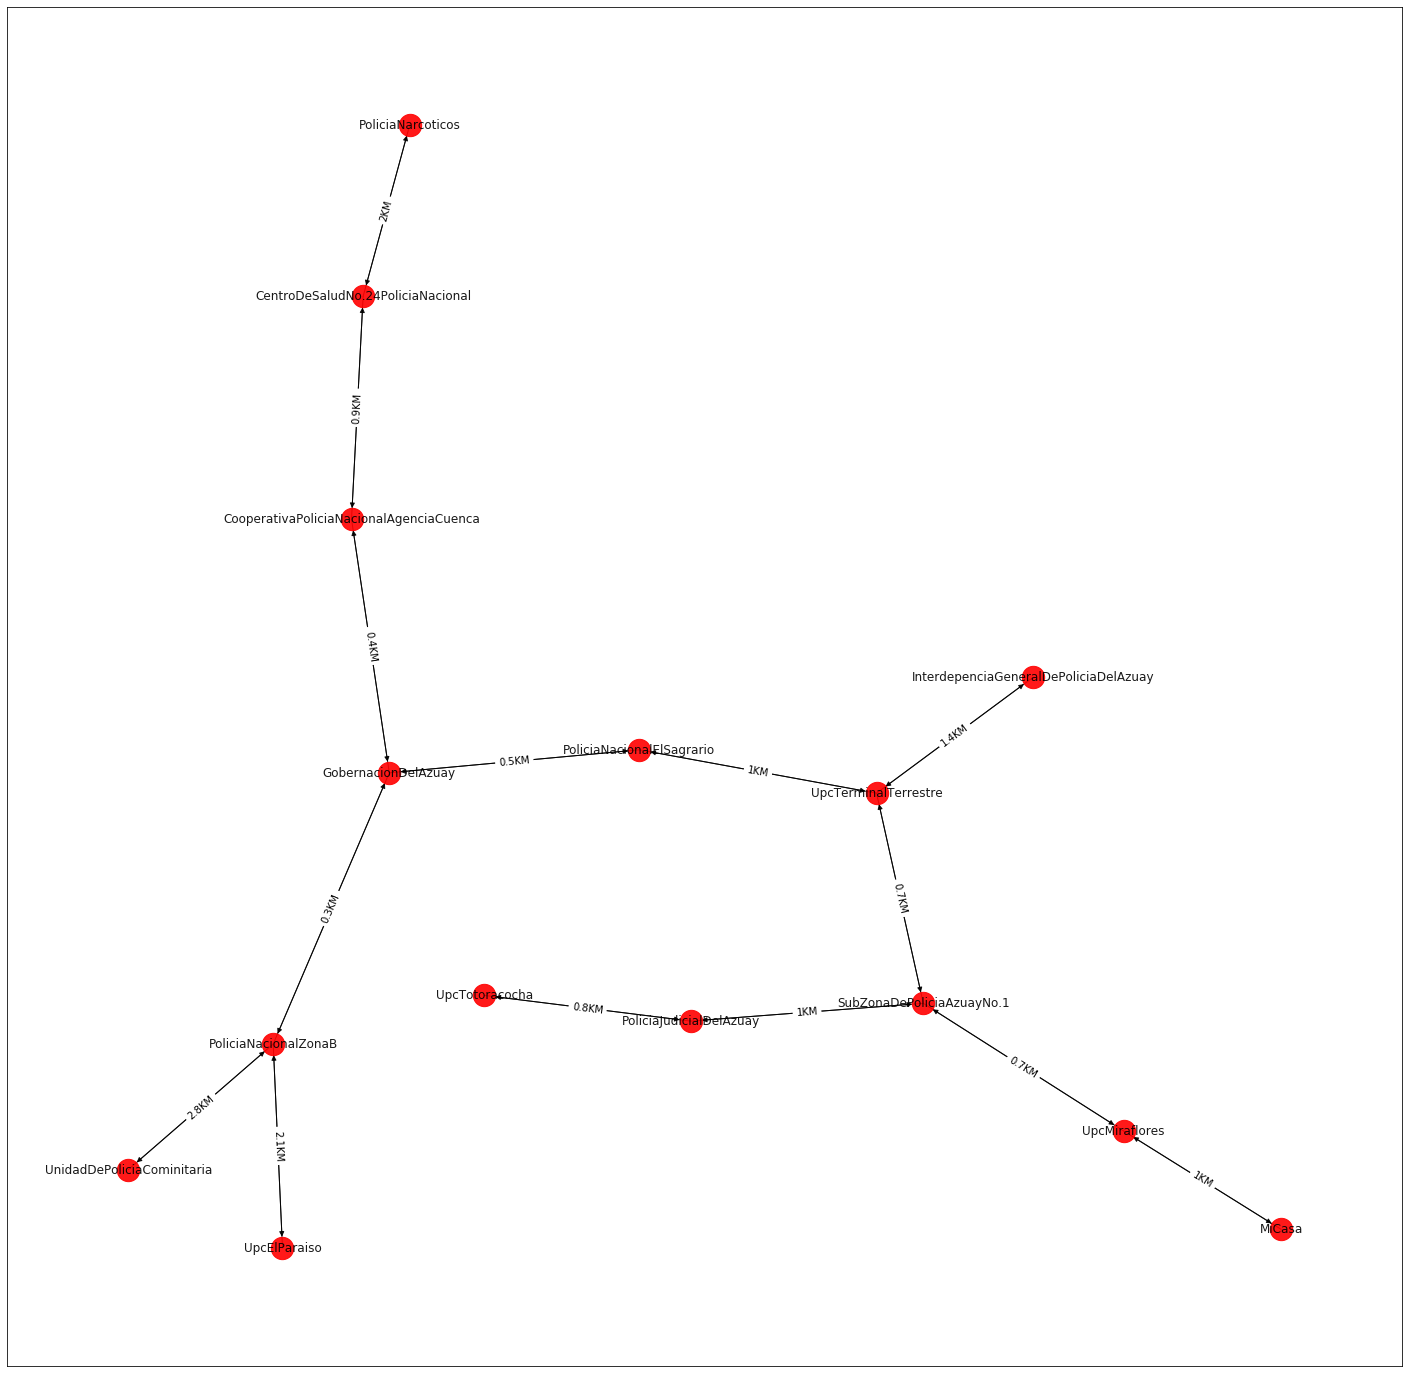

LAS SOLUCION ES DE LA BUSQUEDA ES LA SIGUIENTE: 

['PoliciaNarcoticos', 'CentroDeSaludNo.24PoliciaNacional', 'CooperativaPoliciaNacionalAgenciaCuenca', 'GobernacionDelAzuay', 'PoliciaNacionalZonaB', 'UpcElParaiso']
Costo total: 5.699999999999999


In [29]:
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'MiCasa': {'UpcMiraflores':1},
        'UpcMiraflores': {'MiCasa':1, 'SubZonaDePoliciaAzuayNo.1':0.7},
        'SubZonaDePoliciaAzuayNo.1': {'UpcMiraflores':0.7,'UpcTerminalTerrestre':0.7,'PoliciaJudicialDelAzuay':1}, 
        'UpcTerminalTerrestre':{ 'SubZonaDePoliciaAzuayNo.1':0.7,'InterdepenciaGeneralDePoliciaDelAzuay':1.4,'PoliciaNacionalElSagrario':1},
        'PoliciaJudicialDelAzuay':{'SubZonaDePoliciaAzuayNo.1':1,'UpcTotoracocha':0.8}, 
        'InterdepenciaGeneralDePoliciaDelAzuay':{'UpcTerminalTerrestre':1.4}, 
        'PoliciaNacionalElSagrario':{'UpcTerminalTerrestre':1,'GobernacionDelAzuay':0.5},
        'UpcTotoracocha':{'PoliciaJudicialDelAzuay':0.8}, 
        'GobernacionDelAzuay':{'PoliciaNacionalElSagrario':0.5,'CooperativaPoliciaNacionalAgenciaCuenca':0.4,'PoliciaNacionalZonaB':0.3}, 
        'CooperativaPoliciaNacionalAgenciaCuenca':{'GobernacionDelAzuay':0.4,'CentroDeSaludNo.24PoliciaNacional':0.9}, 
        'PoliciaNacionalZonaB':{'GobernacionDelAzuay':0.3,'UpcElParaiso':2.1,'UnidadDePoliciaCominitaria':2.8}, 
        'CentroDeSaludNo.24PoliciaNacional':{'CooperativaPoliciaNacionalAgenciaCuenca':0.9,'PoliciaNarcoticos':2}, 
        'UpcElParaiso':{'PoliciaNacionalZonaB':2.1},
        'UnidadDePoliciaCominitaria':{'PoliciaNacionalZonaB':2.8}, 
        'PoliciaNarcoticos':{'CentroDeSaludNo.24PoliciaNacional':2}
        
         } 

    
    init_state = 'PoliciaNarcoticos'
    solution = 'UpcElParaiso'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print("LAS SOLUCION ES DE LA BUSQUEDA ES LA SIGUIENTE: \n")
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")

    
    print("Las CONEXIONES DEL GRAFO DE POLICIAS SON LAS SIGUIENTES \n")
    graficarCiudades(connections)

3.Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.

+ tn = 14
+ d = 9

1.FACTOR DE RAMIFICACION.  
- Formula:b = tn/d 
- b = 14/9  
- b = 1.55 

2.COMPLEJIDAD TEMPORAL 
- Formula=O(b^n)  
- Complejidad Temporal = (1.55)^9
- Complejidad Temporal = 53 

2.COMPLEJIDAD ESPACIAL 

- Formula = O(nb)
- Complejidad Espacial = (9*1.55) 
- Complejidad Espacial = 14


4.Generar un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.

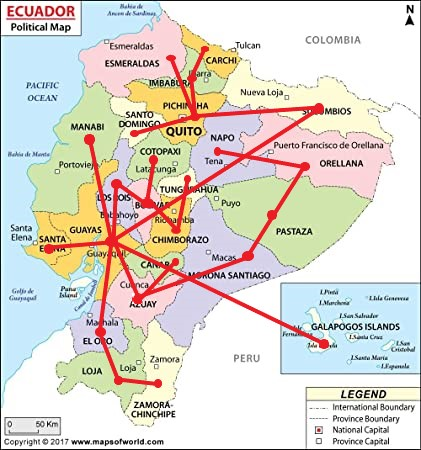

In [39]:
from IPython.display import Image
Image(filename='ProEcuador.jpg')

LA SOLUCION ES
['Guayas', 'Azuay', 'Morona Santiago', 'Pastaza', 'Orellana']
Total Contagiados: 243
Las CONEXIONES DE LA EXPANSION DEL COVID SON LAS SIGUIENTES 



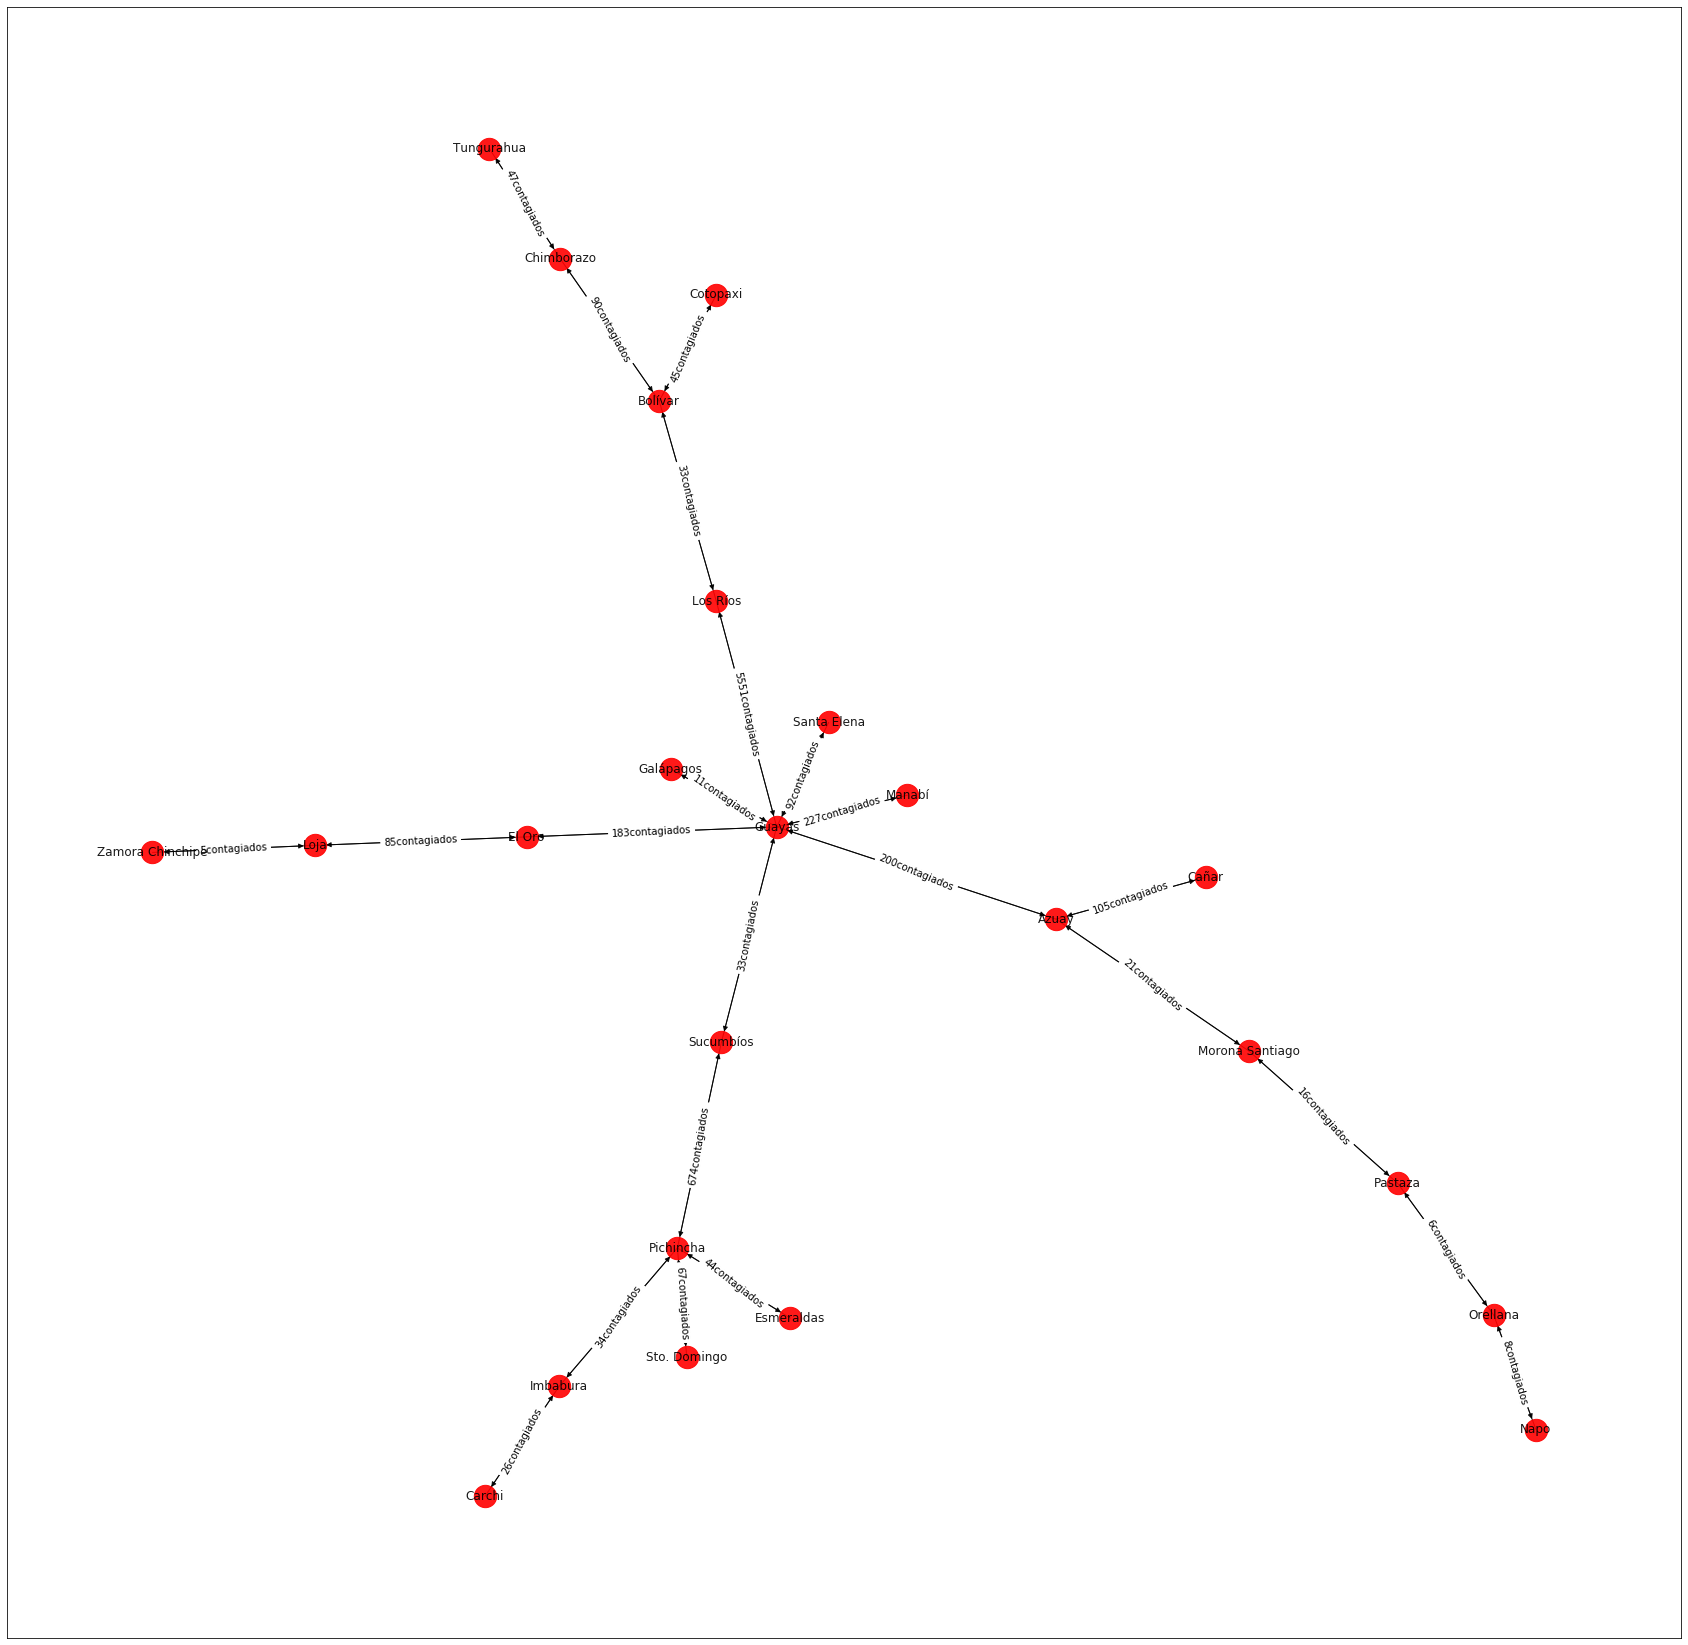

In [37]:
import networkx as nx
from IPython.display import Image, display 
import matplotlib.pyplot as plt
def graficarCovid(conexiones):
    grafico = nx.DiGraph()
    grafico.add_nodes_from(conexiones) 
    for valor, listaValor in conexiones.items():
        for a in listaValor:    
            grafico.add_edge(valor,a,contagiados=str(listaValor[a])+"contagiados")
        
    plt.figure(figsize=(30,30))  
    pos=nx.spring_layout(grafico)
    edge_labels = nx.get_edge_attributes(grafico,'contagiados')   
    nx.draw_networkx_edge_labels(grafico, pos, edge_labels = edge_labels) 
    nx.draw_networkx(grafico, pos, node_color = "red", node_size=500, alpha=0.9, labels={node:node for node in grafico.nodes()})
    plt.show()


# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution,g):
    var=""
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            g.add_node(node.data,color='red')
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        g.add_edge(node.data,child,label=child.cost)
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        g.add_edge(node.data,child,label=child.cost)
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connectionsCovidActualidad={
        'Los Ríos': {'Guayas':5551, 'Bolívar':33},
        'Guayas': {'Sucumbíos':33, 'Azuay':200,'El Oro':183,'Manabí':227,'Santa Elena':92,'Galápagos':11,'Los Ríos':5551},
        'Bolívar': {'Chimborazo':90,'Cotopaxi':45,'Los Ríos':33},
        'Sucumbíos':{'Pichincha':674,'Guayas':33},
        'Azuay': {'Morona Santiago':21,'Cañar':105,'Guayas':200},
        'El Oro': {'Loja':85, 'Guayas':183},
        'Manabí': {'Guayas':227},
        'Santa Elena': {'Guayas':92},
        'Galápagos': {'Guayas':11},
        'Chimborazo': {'Tungurahua':47,'Bolívar':90},
        'Cotopaxi': {'Bolívar':45},
        'Pichincha':{'Sto. Domingo':67,'Esmeraldas':44,'Imbabura':34,'Sucumbíos':674},
        'Morona Santiago': {'Pastaza':16, 'Azuay':21},
        'Cañar': {'Azuay':105},
        'Loja': {'Zamora Chinchipe':5,'El Oro':85},
        'Tungurahua': {'Chimborazo':47},
        'Sto. Domingo': {'Pichincha':67},
        'Esmeraldas': {'Pichincha':44},
        'Imbabura': {'Carchi':26,'Pichincha':34},
        'Pastaza': {'Orellana':6, 'Morona Santiago':16},
        'Carchi': {'Imbabura':26},
        'Orellana': {'Napo':8,'Pastaza':6},
        'Napo': {'Orellana':8},
        'Zamora Chinchipe':{'Loja':5}
    } 
    

    init_state = 'Guayas'
    solution =  'Orellana'
    solution_node = search_costo_solucion(connectionsCovidActualidad, init_state, solution,Grafo)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print("LA SOLUCION ES")
        print(result)
        print("Total Contagiados: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else: 
        print("No hay solucion !!!!") 
        
    print("Las CONEXIONES DE LA EXPANSION DEL COVID SON LAS SIGUIENTES \n")
    graficarCovid(connectionsCovidActualidad)

# Conclusiones
-El trabajo ha sido realizado de manera satisfactoria utilizando el metodo de busqueda por costo. Este metodo 
es muy eficiente ya que nos permite encontrar el camino mas corto de llegar. 

-Se ha realizado la graficas de manera correcta tanto de las ciudades, hospitales y expansion del covid en el Ecuador.

BIBLIOGRAFIA:
1. https://www.salud.gob.ec/wp-content/uploads/2020/04/Boletin-043-AM_Nacional.pdf?fbclid=IwAR0Wxg-U9Ya3Dz8TPF8iaLnai2K0gWiV574gsGQEJYs3mZqb6vt0ng5vUFk 

2. https://www.gestionderiesgos.gob.ec/informes-de-situacion-covid-19-desde-el-13-de-marzo-del-2020/ 